In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df = pd.read_csv('./Train.csv')
df.dtypes

ID                   int64
Gender              object
Ever_Married        object
Age                  int64
Graduated           object
Profession          object
Work_Experience    float64
Spending_Score      object
Family_Size        float64
Var_1               object
Segmentation        object
dtype: object

In [3]:
from sklearn.preprocessing import LabelEncoder

df_new = df

cat = ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 'Var_1']

le = LabelEncoder()
df_new
for c in cat:
    df_new[c] = le.fit_transform(df[c])

In [4]:
df_new['Segmentation'] = df_new['Segmentation'].replace(['A', 'B', 'C', 'D'], [1, 2, 3, 4])
df_new = df_new.dropna()
df_new

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,1,0,22,0,5,1.0,2,4.0,3,4
2,466315,0,1,67,1,2,1.0,2,1.0,5,2
3,461735,1,1,67,1,7,0.0,1,2.0,5,2
5,461319,1,1,56,0,0,0.0,0,2.0,5,3
6,460156,1,0,32,1,5,1.0,2,3.0,5,3
...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,1,0,22,0,9,0.0,2,7.0,0,4
8064,464685,1,0,35,0,4,3.0,2,4.0,3,4
8065,465406,0,0,33,1,5,1.0,2,1.0,5,4
8066,467299,0,0,27,1,5,1.0,2,4.0,5,2


In [9]:
df_f = df_new.iloc[:, 1:-1]
df_t = df_new.iloc[:,-1]

In [10]:
df_f.describe()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
count,6969.000000,6969.000000,6969.000000,6969.000000,6969.000000,6969.000000,6969.000000,6969.000000,6969.000000
mean,0.549146,0.612713,43.469364,0.644282,2.799541,2.633089,1.349978,2.844167,4.183671
std,0.497614,0.517727,16.531090,0.496424,2.605659,3.402505,0.852783,1.528469,1.431907
min,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,0.000000,31.000000,0.000000,0.000000,0.000000,1.000000,2.000000,3.000000
50%,1.000000,1.000000,41.000000,1.000000,3.000000,1.000000,2.000000,3.000000,5.000000
75%,1.000000,1.000000,53.000000,1.000000,5.000000,4.000000,2.000000,4.000000,5.000000
max,1.000000,2.000000,89.000000,2.000000,9.000000,14.000000,2.000000,9.000000,7.000000


In [11]:
def min_max_normalize(l):
    normalized = []
    
    for v in l:
        normalized_num = (v - min(l)) / (max(l) - min(l))
        normalized.append(normalized_num)
    
    return normalized

In [12]:
for i in df_f.columns:
    try:
        df_f[i] = min_max_normalize(df_f[i])
    except KeyError:
        var = 0
df_f.describe()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
count,6969.000000,6969.000000,6969.000000,6969.000000,6969.000000,6969.000000,6969.000000,6969.000000,6969.000000
mean,0.549146,0.306357,0.358723,0.322141,0.311060,0.188078,0.674989,0.230521,0.597667
std,0.497614,0.258864,0.232832,0.248212,0.289518,0.243036,0.426392,0.191059,0.204558
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.183099,0.000000,0.000000,0.000000,0.500000,0.125000,0.428571
50%,1.000000,0.500000,0.323944,0.500000,0.333333,0.071429,1.000000,0.250000,0.714286
75%,1.000000,0.500000,0.492958,0.500000,0.555556,0.285714,1.000000,0.375000,0.714286
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

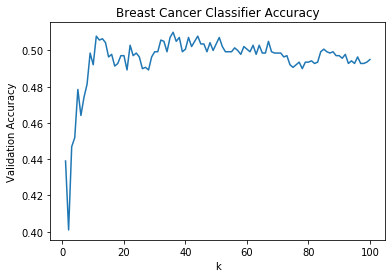

35


In [15]:
train_X, test_X, train_Y, test_Y = np.array(train_test_split(df_f, df_t, test_size = 0.2, random_state = 100))

k_list = range(1,101)
accuracies = []

for k in k_list:
  knn = KNeighborsClassifier(n_neighbors = k)
  knn.fit(train_X.values, train_Y.values.ravel())
  accuracies.append(knn.score(test_X.values, test_Y.values))

plt.plot(k_list, accuracies)
plt.xlabel("k")
plt.ylabel("Validation Accuracy")
plt.title("Customer Segmentation Classifier Accuracy")
plt.show()
max_index_col = np.argmax(accuracies, axis=0)
print(max_index_col) # finding the best k value

In [16]:
knn = KNeighborsClassifier(n_neighbors = 35)
knn.fit(train_X.values, train_Y.values.ravel())

print(knn.score(test_X.values, test_Y.values))

0.5071736011477762
